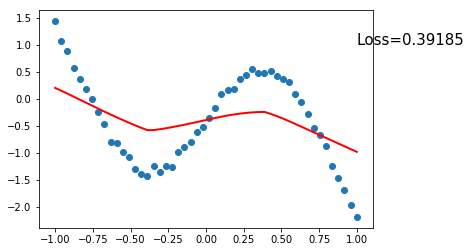

Epoch [100/1000] test: Loss:tensor(0.3919, grad_fn=<MseLossBackward>)tensor([-0.8594], grad_fn=<AddBackward0>)


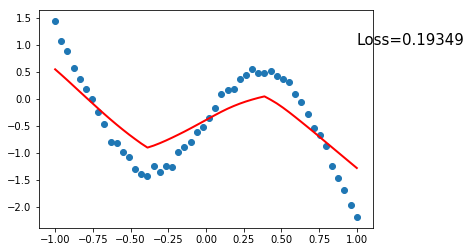

Epoch [200/1000] test: Loss:tensor(0.1935, grad_fn=<MseLossBackward>)tensor([-1.0528], grad_fn=<AddBackward0>)


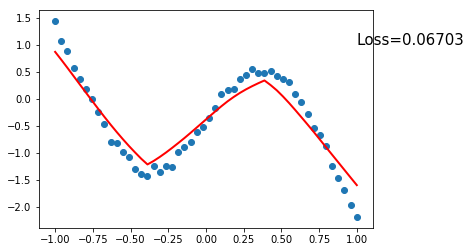

Epoch [300/1000] test: Loss:tensor(0.0670, grad_fn=<MseLossBackward>)tensor([-1.2585], grad_fn=<AddBackward0>)


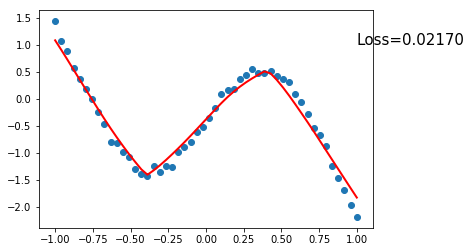

Epoch [400/1000] test: Loss:tensor(0.0217, grad_fn=<MseLossBackward>)tensor([-1.4035], grad_fn=<AddBackward0>)


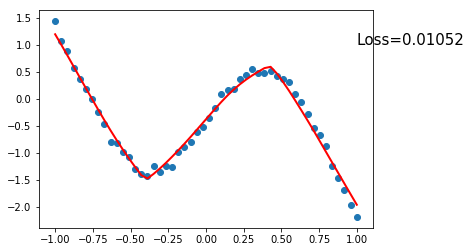

Epoch [500/1000] test: Loss:tensor(0.0105, grad_fn=<MseLossBackward>)tensor([-1.4863], grad_fn=<AddBackward0>)


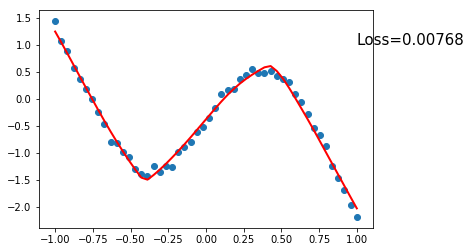

Epoch [600/1000] test: Loss:tensor(0.0077, grad_fn=<MseLossBackward>)tensor([-1.5248], grad_fn=<AddBackward0>)


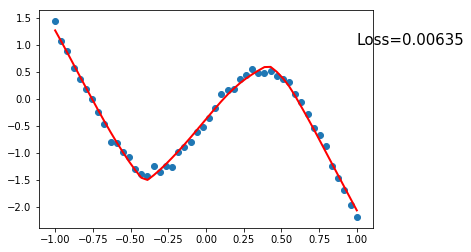

Epoch [700/1000] test: Loss:tensor(0.0063, grad_fn=<MseLossBackward>)tensor([-1.5434], grad_fn=<AddBackward0>)


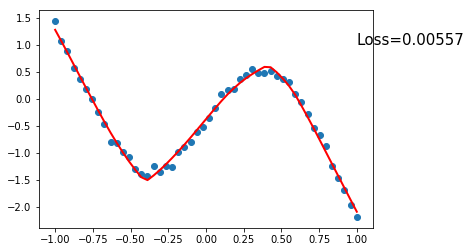

Epoch [800/1000] test: Loss:tensor(0.0056, grad_fn=<MseLossBackward>)tensor([-1.5551], grad_fn=<AddBackward0>)


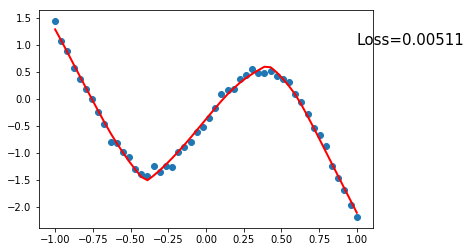

Epoch [900/1000] test: Loss:tensor(0.0051, grad_fn=<MseLossBackward>)tensor([-1.5630], grad_fn=<AddBackward0>)


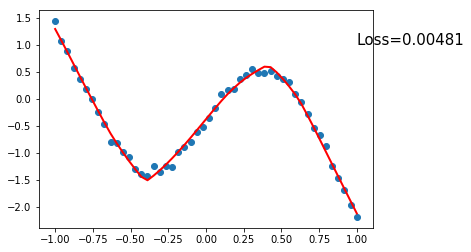

Epoch [1000/1000] test: Loss:tensor(0.0048, grad_fn=<MseLossBackward>)tensor([-1.5689], grad_fn=<AddBackward0>)


In [2]:
# net architecture 3 linear (1,1000), 2 ReLU
# 1-linear1-1000 --> reLU1 --> 1000-linear2-1000 --> reLU2 --> 1000-linear3-1 
# performs regression 

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1.0,1.0, num = 50)
y = -x**3 + np.sin(4*x) - 0.5

x_train = torch.from_numpy((np.array([x])).T).float()
y_train = torch.from_numpy((np.array([y])).T).float() 
y_train = y_train + 0.2* torch.rand(x_train.size())

learning_rate = 0.005
num_epochs = 1000

class RegNet(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(RegNet, self).__init__()
        self.linear1 = torch.nn.Linear(n_feature, n_hidden)   
        self.linear2 = torch.nn.Linear(n_hidden, n_hidden)
        self.linear3 = torch.nn.Linear(n_hidden, n_feature)
        
    def forward(self, x):
        pred = self.linear1(x)     
        pred = F.relu(pred)
        pred = self.linear2(pred)
        pred = F.relu(pred)
        pred = self.linear3(pred)
        return pred

model = RegNet(n_feature=1, n_hidden=1000, n_output=1)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

def training(num_epochs, model, loss_fn, optimizer):
    for epoch in range(num_epochs):
        inputs = x_train
        targets = y_train
        
        pred = model(inputs)
        loss = loss_fn(pred, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (epoch+1)%100 ==0:           
            plt.cla()
            plt.scatter(x_train.data.numpy(), y_train.data.numpy())
            plt.plot(x_train.data.numpy(), pred.data.numpy(), 'r-', lw=2)
            plt.text(1.0, 1.0, 'Loss=%.5f' % loss.data.numpy(), fontdict={'size': 15, 'color':  'black'})
            plt.pause(0.1)
        
        
        if (epoch+1)%100 == 0:
            test_point = torch.tensor([0.9])
            pred = model(test_point)
            
            print ('Epoch [' + str(epoch+1) + '/' + str(num_epochs) + '] ' + 'test: ', end='')
            print ('Loss:' + str(loss) + str(pred))
        
training(num_epochs, model, loss_fn, optimizer)

